In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy
import json
from io import StringIO
from IPython.display import Image, display



### 1. Gathering Data

#### 1.1 Twitter archive (CSV)
#### 1.2 Image predictions (TSV from URL)
#### 1.3 Additional tweet data via Twitter API



In [3]:
# Downloading the image predictions TSV file using requests
response = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
img_predictions = pd.read_csv(StringIO(response.text), sep='\t')


In [4]:
# parse the TSV text content as csv using tab as delimiter
img_predictions = pd.read_csv(StringIO(response.text), sep='\t')

In [5]:
img_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
#reading the csv file
tw_archive = pd.read_csv('twitter_archive_enhanced.csv')
tw_archive.head(2)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN


In [7]:
# reading the tweet data
tweet = pd.read_json('tweet_json.txt', lines = True)
tweet.head()

,created_at,edit_history_tweet_ids,author_id,id,text,public_metrics
0,2025-04-30 22:18:20+00:00,[1917705101231415604],4196983835,1917705101231415552,This is Arang and Aro. Aro is giving them the ...,"{'retweet_count': 745, 'reply_count': 56, 'lik..."


### 2. Assessing Data

In this section, we will assess the gathered data both visually and programmatically to identify quality and tidiness issues.



In [8]:
img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


quality issue
from what i see datatype of id is int64 even though object datatype since its not a mathimatical value 

In [9]:
# random sample of data to visually asses the dataset 
img_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
836,694206574471057408,https://pbs.twimg.com/media/CaJRMPQWIAA1zL9.jpg,1,Shih-Tzu,0.352547,True,toy_poodle,0.155720,True,Maltese_dog,0.116657,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
844,695074328191332352,https://pbs.twimg.com/media/CaVmajOWYAA1uNG.jpg,1,Shih-Tzu,0.510106,True,Tibetan_terrier,0.071981,True,Lhasa,0.069231,True
416,674019345211760640,https://pbs.twimg.com/media/CVqZBO8WUAAd931.jpg,1,collie,0.992732,True,borzoi,0.005043,True,Shetland_sheepdog,0.001725,True
636,681242418453299201,https://pbs.twimg.com/media/CXRCXesVAAArSXt.jpg,1,motor_scooter,0.255934,False,rifle,0.145202,False,assault_rifle,0.097000,False
673,683357973142474752,https://pbs.twimg.com/media/CXvGbWeWMAcRbyJ.jpg,1,Pembroke,0.406509,True,Cardigan,0.154854,True,Siberian_husky,0.136366,True
734,686947101016735744,https://pbs.twimg.com/media/CYiGvn-UwAEe4wL.jpg,1,refrigerator,0.799795,False,medicine_chest,0.182538,False,ice_bear,0.001431,False
376,673148804208660480,https://pbs.twimg.com/media/CVeBQwiUsAAqhLw.jpg,1,tub,0.873010,False,bathtub,0.091434,False,toilet_seat,0.025456,False
653,682047327939461121,https://pbs.twimg.com/media/CXcebTeWsAUQJ-J.jpg,1,teddy,0.364095,False,doormat,0.119243,False,toyshop,0.035127,False
357,672609152938721280,https://pbs.twimg.com/media/CVWWdKLWEAEnSk7.jpg,1,microwave,0.981946,False,rotisserie,0.007472,False,television,0.005881,False


In [49]:
img_predictions.isnull().sum()

tweet_id        0
jpg_url         0
img_num         0
prediction    324
dtype: int64

## quality issue 2

Issue:
The image_predictions.tsv file contains predictions (p1, p2, p3) that are not actual dog breeds. Examples include labels such as "ostrich", "gas_pump", and "teddy". These are clearly not dogs, yet they are present in the dataset.

In [10]:
# checking for NaN values
img_predictions.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [11]:
# checking for duplicate rows
img_predictions.duplicated().sum()

np.int64(0)

# No duplicates or missing in this dataset

In [12]:
tw_archive.sample(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
629,794355576146903043,NaN,NaN,2016-11-04 01:48:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Butter. She can have wh...,7.887659e+17,4.196984e+09,2016-10-19 15:37:03 +0000,https://twitter.com/dog_rates/status/788765914...,12,10,Butter,NaN,NaN,NaN,NaN
1576,687460506001633280,NaN,NaN,2016-01-14 02:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kramer. He's a Picasso Tortellini. Tie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687460506...,10,10,Kramer,NaN,NaN,NaN,NaN
2051,671488513339211776,NaN,NaN,2015-12-01 00:38:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Julius. He's a cool dog. Carries seash...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671488513...,8,10,Julius,NaN,NaN,NaN,NaN
1243,711968124745228288,NaN,NaN,2016-03-21 17:30:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winston. He's trapped in a cup of coffee....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711968124...,10,10,Winston,NaN,NaN,pupper,NaN
33,885984800019947520,NaN,NaN,2017-07-14 22:10:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion advised. This is Jimbo. He w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885984800...,12,10,Jimbo,NaN,NaN,NaN,NaN
710,784826020293709826,NaN,NaN,2016-10-08 18:41:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rusty. He's going D1 for sure. Insane ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/784826020...,13,10,Rusty,NaN,NaN,NaN,NaN
2054,671390180817915904,NaN,NaN,2015-11-30 18:07:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Striped dog here. Having fun playing on back. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671390180...,7,10,NaN,NaN,NaN,NaN,NaN
1538,689835978131935233,NaN,NaN,2016-01-20 15:44:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fynn &amp; Taco. Fynn is an all-powerful ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689835978...,11,10,Fynn,NaN,NaN,NaN,NaN
1171,720415127506415616,NaN,NaN,2016-04-14 00:55:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Garden's coming in nice this year. 10/10 https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720415127...,10,10,NaN,NaN,NaN,NaN,NaN
712,784431430411685888,NaN,NaN,2016-10-07 16:33:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stormy. He's curly af. Already pupared...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/784431430...,12,10,Stormy,NaN,NaN,NaN,NaN


# issuses

The name column includes invalid or incorrect names such as "an", "a", or is filled with NaN even when a dog is clearly mentioned in the tweet text.

Some rows are retweets, indicated by non-null values in the columns retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp. These are supposed to be excluded per project instructions.

### tidiness issue

the columns ['doggo' , 'floofer' , 'pupper' , 'puppo'] can combine into one culomn representing dog statge for ease and improve readability

In [13]:
tw_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

qualyty issue 

as in img_prediction this dataset has tweet_idas an int64 datatype

tidiness issue

rating numerator and denominator coulomns can be combined by dividing them and putting the quotient in one culomn for easier and readability

In [14]:
# checking for NaN values
tw_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                           745
doggo                         2259
floofer                       2346
pupper                        2099
puppo                         2326
dtype: int64

quality issue 

some culomns have missing data since this data isnt numerical these culomns need to be removed

In [15]:
#checking for Nan values
tw_archive.duplicated().sum()

np.int64(0)

### assesing the tweet dataset

In [16]:
tweet.sample(10, replace=True)


,created_at,edit_history_tweet_ids,author_id,id,text,public_metrics
0,2025-04-30 22:18:20+00:00,[1917705101231415604],4196983835,1917705101231415552,This is Arang and Aro. Aro is giving them the ...,"{'retweet_count': 745, 'reply_count': 56, 'lik..."
0,2025-04-30 22:18:20+00:00,[1917705101231415604],4196983835,1917705101231415552,This is Arang and Aro. Aro is giving them the ...,"{'retweet_count': 745, 'reply_count': 56, 'lik..."
0,2025-04-30 22:18:20+00:00,[1917705101231415604],4196983835,1917705101231415552,This is Arang and Aro. Aro is giving them the ...,"{'retweet_count': 745, 'reply_count': 56, 'lik..."
0,2025-04-30 22:18:20+00:00,[1917705101231415604],4196983835,1917705101231415552,This is Arang and Aro. Aro is giving them the ...,"{'retweet_count': 745, 'reply_count': 56, 'lik..."
0,2025-04-30 22:18:20+00:00,[1917705101231415604],4196983835,1917705101231415552,This is Arang and Aro. Aro is giving them the ...,"{'retweet_count': 745, 'reply_count': 56, 'lik..."
0,2025-04-30 22:18:20+00:00,[1917705101231415604],4196983835,1917705101231415552,This is Arang and Aro. Aro is giving them the ...,"{'retweet_count': 745, 'reply_count': 56, 'lik..."
0,2025-04-30 22:18:20+00:00,[1917705101231415604],4196983835,1917705101231415552,This is Arang and Aro. Aro is giving them the ...,"{'retweet_count': 745, 'reply_count': 56, 'lik..."
0,2025-04-30 22:18:20+00:00,[1917705101231415604],4196983835,1917705101231415552,This is Arang and Aro. Aro is giving them the ...,"{'retweet_count': 745, 'reply_count': 56, 'lik..."
0,2025-04-30 22:18:20+00:00,[1917705101231415604],4196983835,1917705101231415552,This is Arang and Aro. Aro is giving them the ...,"{'retweet_count': 745, 'reply_count': 56, 'lik..."
0,2025-04-30 22:18:20+00:00,[1917705101231415604],4196983835,1917705101231415552,This is Arang and Aro. Aro is giving them the ...,"{'retweet_count': 745, 'reply_count': 56, 'lik..."


quality issue

some coloumns in this dataset are unnecessary in our analysis

In [17]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   created_at              1 non-null      datetime64[ns, UTC]
 1   edit_history_tweet_ids  1 non-null      object             
 2   author_id               1 non-null      int64              
 3   id                      1 non-null      int64              
 4   text                    1 non-null      object             
 5   public_metrics          1 non-null      object             
dtypes: datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 180.0+ bytes


quality issue 

in this dataset tweet_id has an int64 datatype

In [18]:
#checking for NaN values
tweet.isna().sum()

created_at                0
edit_history_tweet_ids    0
author_id                 0
id                        0
text                      0
public_metrics            0
dtype: int64

quality issues 

there is no issues here

### 3. Cleaning Data

fixing all problems

issue 1

Define

the culomns ['p1','p2','p3','p1_conf','p2_conf','p1_dog','p2_dog','p3_dog'] 
are in more details than we need and we can combine them in one colomn to be easy to read

In [19]:
#making a backup copy of dataset
img_predictions_backup = img_predictions.copy()

# merging the predictions of the algorithm 
img_predictions.loc[img_predictions["p3_dog"] == True, 'prediction'] = img_predictions["p3"]
img_predictions.loc[img_predictions["p2_dog"] == True, 'prediction'] = img_predictions["p2"]
img_predictions.loc[img_predictions["p1_dog"] == True, 'prediction'] = img_predictions["p1"]

#dropping the colomns 
img_predictions.drop(['p1', 'p2', 'p3', 'p1_conf','p2_conf','p3_conf', 'p1_dog', 'p2_dog', 'p3_dog'], axis=1, inplace=True)

Test

In [20]:
#checking the dataset to make sure about changes
img_predictions.head()

,tweet_id,jpg_url,img_num,prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher


issue 2

define

the culomns ["doggo","floofer","pupper","puppo"] are hard to analyse ,the can be combined into one culomn representing the dog stage to improve readability 

In [21]:
# Replacing both 'None' and NaN with empty strings 
stage_cols = ["doggo", "floofer", "pupper", "puppo"]
tw_archive[stage_cols] = tw_archive[stage_cols].replace("None", "").fillna("")

# Combining the 4 columns into a new column named dog_party 
tw_archive["dog_party"] = tw_archive["doggo"] + tw_archive["floofer"] + tw_archive["pupper"] + tw_archive["puppo"]

# Replacing specific combinations with readable format 
tw_archive.loc[tw_archive["dog_party"] == "doggopupper", "dog_party"] = "doggo, pupper"
tw_archive.loc[tw_archive["dog_party"] == "doggopuppo", "dog_party"] = "doggo, puppo"
tw_archive.loc[tw_archive["dog_party"] == "doggofloofer", "dog_party"] = "doggo, floofer"

# Replacing empty strings with NaN (safely)
tw_archive["dog_party"] = tw_archive["dog_party"].replace("", np.nan)



test

In [22]:
tw_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_party
993,748575535303884801,NaN,NaN,2016-06-30 17:54:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is one of the most reckless puppers I've ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748575535...,6,10,one,,,,,NaN
1314,706901761596989440,NaN,NaN,2016-03-07 17:58:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Elliot. He's blocking the roadway. Dow...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706901761...,3,10,Elliot,,,,,NaN
983,749395845976588288,NaN,NaN,2016-07-03 00:14:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is George. He just remembered that bees a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749395845...,10,10,George,,,,,NaN
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,NaN,,,,,NaN
1251,710997087345876993,NaN,NaN,2016-03-19 01:11:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Milo and Amos. They are the best of pals....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710997087...,12,10,Milo,,,,,NaN
498,813130366689148928,8.131273e+17,4.196984e+09,2016-12-25 21:12:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been informed by multiple sources that th...,NaN,NaN,NaN,NaN,12,10,NaN,,,,,NaN
512,811744202451197953,NaN,NaN,2016-12-22 01:24:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Halo. She likes watermelon. 13/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/811744202...,13,10,Halo,,,,,NaN
198,854365224396361728,NaN,NaN,2017-04-18 16:05:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Einstein. He's having a really good da...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/854365224...,13,10,Einstein,,,,,NaN
710,784826020293709826,NaN,NaN,2016-10-08 18:41:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rusty. He's going D1 for sure. Insane ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/784826020...,13,10,Rusty,,,,,NaN
1137,728046963732717569,NaN,NaN,2016-05-05 02:21:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Raymond. He controls fountains with hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728046963...,11,10,Raymond,,,,,NaN


In [23]:
# the sample didnt have party of floofer so i will checked manually
tw_archive[tw_archive["dog_party"] == "floofer"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_party
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,,floofer,,,floofer
582,800388270626521089,NaN,NaN,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,,floofer,,,floofer
774,776218204058357768,NaN,NaN,2016-09-15 00:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776218204...,13,10,NaN,,floofer,,,floofer
984,749317047558017024,NaN,NaN,2016-07-02 19:01:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Blu. He's a wild bush Floofer. I wish ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749317047...,12,10,Blu,,floofer,,,floofer
1022,746542875601690625,NaN,NaN,2016-06-25 03:17:46 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a golden floofer helping with the groce...,NaN,NaN,NaN,https://vine.co/v/5uZYwqmuDeT,11,10,NaN,,floofer,,,floofer
1091,737445876994609152,NaN,NaN,2016-05-31 00:49:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Just wanted to share this super rare Rainbow F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737445876...,13,10,NaN,,floofer,,,floofer
1110,733822306246479872,NaN,NaN,2016-05-21 00:50:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's a Polynesian Floofer. Dapp...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/733822306...,10,10,Moose,,floofer,,,floofer
1534,689993469801164801,NaN,NaN,2016-01-21 02:10:37 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a rare High Stepping Al...,NaN,NaN,NaN,https://vine.co/v/ienexVMZgi5,12,10,NaN,,floofer,,,floofer
1614,685307451701334016,NaN,NaN,2016-01-08 03:50:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Petrick. He's an Altostratus Floo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685307451...,11,10,Petrick,,floofer,,,floofer


issue 3

Define

the tw_archive dataset has some columns that contain missing data so we will delete it 

In [24]:
# Creating backup
tw_archive_backup = tw_archive.copy()

# Dropping columns not needed
tw_archive.drop(
    ["in_reply_to_status_id", "in_reply_to_user_id", 
     "retweeted_status_id", "retweeted_status_user_id", 
     "retweeted_status_timestamp", "name", "doggo", 
     "floofer", "pupper", "puppo"], 
    axis=1, 
    inplace=True
)


test

In [25]:
tw_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_party
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,NaN


issue 4 

define

the tw_archive dataset wasnt exclusive to tweets retweets were also in the dataset and were treeted as tweetswich so it should be removed from dataset

In [26]:
#removing all rows
tw_archive = tw_archive[~tw_archive["text"].str.startswith("RT @")]


test

In [27]:
#checking
tw_archive[tw_archive["text"].str.startswith("RT @", na=False)]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_party


issue 5 

Define

the dataset has some coloumns contain missing data or data irrelevant so it will be deleted

In [28]:


tweet.head()



,created_at,edit_history_tweet_ids,author_id,id,text,public_metrics
0,2025-04-30 22:18:20+00:00,[1917705101231415604],4196983835,1917705101231415552,This is Arang and Aro. Aro is giving them the ...,"{'retweet_count': 745, 'reply_count': 56, 'lik..."


In [29]:
#checking
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   created_at              1 non-null      datetime64[ns, UTC]
 1   edit_history_tweet_ids  1 non-null      object             
 2   author_id               1 non-null      int64              
 3   id                      1 non-null      int64              
 4   text                    1 non-null      object             
 5   public_metrics          1 non-null      object             
dtypes: datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 180.0+ bytes


issue 6

define

the tweet_id in the tweet dataset is named id only which wouldn't cause confusion it will not work since  i later on merge the 3 datasets

In [30]:
tweet.rename(columns={"id": "tweet_id"}, inplace=True)


test

In [31]:
#checking
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   created_at              1 non-null      datetime64[ns, UTC]
 1   edit_history_tweet_ids  1 non-null      object             
 2   author_id               1 non-null      int64              
 3   tweet_id                1 non-null      int64              
 4   text                    1 non-null      object             
 5   public_metrics          1 non-null      object             
dtypes: datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 180.0+ bytes


issue 7

define

the 3 datasets should be merged into one master dataset called twitter_archive_master

In [32]:
twitter_archive_master = pd.merge(tw_archive, img_predictions, on='tweet_id', how='inner')
print("Shape after merging tw_archive & img_predictions:", twitter_archive_master.shape)



Shape after merging tw_archive & img_predictions: (1994, 11)


In [33]:
twitter_archive_master = pd.merge(twitter_archive_master, tweet, on='tweet_id', how='left')
print("Final shape after merging with tweet:", twitter_archive_master.shape)



Final shape after merging with tweet: (1994, 16)


test

In [34]:
#checking
twitter_archive_master.head()

,tweet_id,timestamp,source,text_x,expanded_urls,rating_numerator,rating_denominator,dog_party,jpg_url,img_num,prediction,created_at,edit_history_tweet_ids,author_id,text_y,public_metrics
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,NaT,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,NaT,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,NaT,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,NaT,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,NaT,NaN,NaN,NaN,NaN


In [35]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   tweet_id                1994 non-null   int64              
 1   timestamp               1994 non-null   object             
 2   source                  1994 non-null   object             
 3   text_x                  1994 non-null   object             
 4   expanded_urls           1994 non-null   object             
 5   rating_numerator        1994 non-null   int64              
 6   rating_denominator      1994 non-null   int64              
 7   dog_party               306 non-null    object             
 8   jpg_url                 1994 non-null   object             
 9   img_num                 1994 non-null   int64              
 10  prediction              1686 non-null   object             
 11  created_at              0 non-null      dat

issue 8

define

some of tweets bof the master dataset are missing and it crucial so we will drop the rows


In [36]:
#removing
twitter_archive_master.dropna(subset=["prediction"],inplace=True)

test

In [37]:
#checking
twitter_archive_master[twitter_archive_master["prediction"].isna()]

,tweet_id,timestamp,source,text_x,expanded_urls,rating_numerator,rating_denominator,dog_party,jpg_url,img_num,prediction,created_at,edit_history_tweet_ids,author_id,text_y,public_metrics


issue 9 

define

the tweet_id columns data type will be changed to object because containing numbers its not suitable for mathematical operations that yeild signifacnt results unlike true numerical values

In [38]:
#changing
twitter_archive_master['tweet_id'] = twitter_archive_master['tweet_id'].astype(object)

test

In [39]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1686 entries, 1 to 1993
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   tweet_id                1686 non-null   object             
 1   timestamp               1686 non-null   object             
 2   source                  1686 non-null   object             
 3   text_x                  1686 non-null   object             
 4   expanded_urls           1686 non-null   object             
 5   rating_numerator        1686 non-null   int64              
 6   rating_denominator      1686 non-null   int64              
 7   dog_party               260 non-null    object             
 8   jpg_url                 1686 non-null   object             
 9   img_num                 1686 non-null   int64              
 10  prediction              1686 non-null   object             
 11  created_at              0 non-null      datetime

issue 10

define

combining the rating numerator and denominator by dividing them to get quotient of rating

In [40]:
# Creating new column
twitter_archive_master['rating'] = twitter_archive_master['rating_numerator'] / twitter_archive_master['rating_denominator']

# Removing old rating columns
twitter_archive_master.drop(["rating_numerator", "rating_denominator"], axis=1, inplace=True)


test

In [41]:
#checking
# Check some sample rows
twitter_archive_master.sample(10)







,tweet_id,timestamp,source,text_x,expanded_urls,dog_party,jpg_url,img_num,prediction,created_at,edit_history_tweet_ids,author_id,text_y,public_metrics,rating
825,736365877722001409,2016-05-28 01:18:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rory. He's extremely impatient. 11/10 ...,https://twitter.com/dog_rates/status/736365877...,pupper,https://pbs.twimg.com/media/CjgYyuvWkAAHU8g.jpg,3,toy_poodle,NaT,NaN,NaN,NaN,NaN,1.1
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,NaT,NaN,NaN,NaN,NaN,1.3
1281,685532292383666176,2016-01-08 18:43:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...","For the last time, WE. DO. NOT. RATE. BULBASAU...",https://twitter.com/dog_rates/status/685532292...,NaN,https://pbs.twimg.com/media/CYN_-6iW8AQhPu2.jpg,1,collie,NaT,NaN,NaN,NaN,NaN,0.9
1058,703611486317502464,2016-02-27 16:03:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scooter. He's experiencing the pupper equ...,https://twitter.com/dog_rates/status/703611486...,pupper,https://pbs.twimg.com/media/CcO66OjXEAASXmH.jpg,1,Pembroke,NaT,NaN,NaN,NaN,NaN,1.0
1143,695816827381944320,2016-02-06 03:50:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a dog enjoying a sunset. 11/10 would tr...,https://twitter.com/dog_rates/status/695816827...,NaN,https://pbs.twimg.com/media/CagJtjYW8AADoHu.jpg,1,Pomeranian,NaT,NaN,NaN,NaN,NaN,1.1
550,778383385161035776,2016-09-21 00:00:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nala. She's a future Dogue model. Won'...,https://twitter.com/dog_rates/status/778383385...,NaN,https://pbs.twimg.com/media/Cs1fjyqWIAE2jop.jpg,1,collie,NaT,NaN,NaN,NaN,NaN,1.3
488,789599242079838210,2016-10-21 22:48:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brownie. She's wearing a Halloween the...,https://twitter.com/dog_rates/status/789599242...,NaN,https://pbs.twimg.com/media/CvU4UZpXgAE1pAV.jpg,2,Chesapeake_Bay_retriever,NaT,NaN,NaN,NaN,NaN,1.2
627,763837565564780549,2016-08-11 20:40:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfie. He's touching a butt. Couldn't ...,https://twitter.com/dog_rates/status/763837565...,NaN,https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg,1,malamute,NaT,NaN,NaN,NaN,NaN,1.1
1367,680889648562991104,2015-12-26 23:15:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cheesy. It's her birthday. She's patie...,https://twitter.com/dog_rates/status/680889648...,NaN,https://pbs.twimg.com/media/CXMBhXfWEAA4mMI.jpg,1,Shetland_sheepdog,NaT,NaN,NaN,NaN,NaN,0.9
525,782747134529531904,2016-10-03 01:00:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Deacon. He's the happiest almost dry d...,https://twitter.com/dog_rates/status/782747134...,doggo,https://pbs.twimg.com/media/CtzgXgeXYAA1Gxw.jpg,1,golden_retriever,NaT,NaN,NaN,NaN,NaN,1.1


issue 11

define

delete timestamp and leave created_at due to limestamp is object while created_at is datatime64

In [42]:
twitter_archive_master.drop(["timestamp"],axis = 1, inplace = True)

test

In [43]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1686 entries, 1 to 1993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   tweet_id                1686 non-null   object             
 1   source                  1686 non-null   object             
 2   text_x                  1686 non-null   object             
 3   expanded_urls           1686 non-null   object             
 4   dog_party               260 non-null    object             
 5   jpg_url                 1686 non-null   object             
 6   img_num                 1686 non-null   int64              
 7   prediction              1686 non-null   object             
 8   created_at              0 non-null      datetime64[ns, UTC]
 9   edit_history_tweet_ids  0 non-null      object             
 10  author_id               0 non-null      float64            
 11  text_y                  0 non-null      object  

### 4. Storing Data

storing the cleaned dataframe "master" in CSV file

In [44]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

### 5. Analyzing and Visualizing Data

1- what is most favourite dog breed

In [45]:
#using groupby


bbreed_tweet_counts = twitter_archive_master.groupby('prediction').size().reset_index(name='tweet_count').sort_values(by='tweet_count', ascending=False)
print(bbreed_tweet_counts)



               prediction  tweet_count
89       golden_retriever          158
37     Labrador_retriever          108
49               Pembroke           95
16              Chihuahua           91
101                   pug           62
..                    ...          ...
34        Irish_wolfhound            1
107    standard_schnauzer            1
21            EntleBucher            1
11   Bouvier_des_Flandres            1
56         Scotch_terrier            1

[113 rows x 2 columns]


test

In [46]:
breed_tweet_counts = twitter_archive_master.groupby('prediction').size().reset_index(name='tweet_count').sort_values(by='tweet_count', ascending=False)

breed_tweet_counts.head()


,prediction,tweet_count
89,golden_retriever,158
37,Labrador_retriever,108
49,Pembroke,95
16,Chihuahua,91
101,pug,62


as we see golden retrievers are the people love

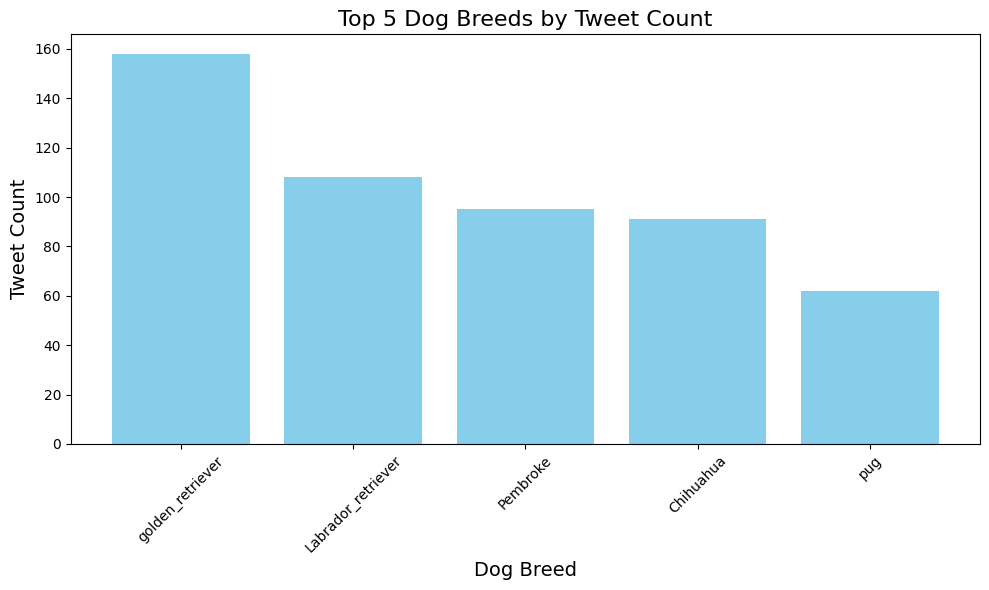

In [47]:
data = {
    'prediction': ['golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua', 'pug'],
    'tweet_count': [158, 108, 95, 91, 62]
}

df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10,6))
plt.bar(df['prediction'], df['tweet_count'], color='skyblue')

plt.title('Top 5 Dog Breeds by Tweet Count', fontsize=16)
plt.xlabel('Dog Breed', fontsize=14)
plt.ylabel('Tweet Count', fontsize=14)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()